<h2> Your first Neural Network! </h2>
In this task, you are going to build a neural network which can then be used to predict on several data-oriented tasks.
<br>
<br>
The goal of this task is to get you familiarize with Python Classes, NumPy (way more than the previous task), and some other aspects of NN - ForwardProp, BackwardProp, etc.

<h4> Technologies we'll use </h4>
NumPy - data manipulation
Pure Python - Classes, objects, instantiations, methods

<h5>Flow:</h5>
    1. We'll define a class called `NeuralNetwork` which will contain several methods:
    <br>
    A. init: (Contstructor)
        <ul>
            <li> self - object </li>
            <li> learning rate - aka "eta" </li>
        </ul>
    <br>
    B. sigmoid: activation function
    <br>
    C. sigmoid derivitative: sigmoid's function deriviative. Can easily be found online :)
    <br>
    D. compute gradients - this method will compute gradients based on the below flow:
    <br>
    `Z = W*X + B
    Z2 = sigmoid(Z)
    prediction = Z2`
    <br>
    E. update parameters - this method will update parameters based on Gradient Descent
    <br>
    F. train - this method will train the model based on data (X, Y) and number of iterations
    <br>
    G. predict - this method will run a forward pass on the model in order to generate a prediction
    
  <h5>Instructions</h5> 
  <ul>
            <li> Implement `sigmoid` method </li>
            <li> Implement `sigmoid_deriv` method </li>
            <li> Implement `_update_parameters` method </li>
            <li> Implement `predict` method </li>
        </ul>
        
  Good luck!

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class NeuralNetwork:
    """This class will represent a neural network, solely based on NumPy"""
    def __init__(self, learning_rate):
        self.weights = np.array([np.random.randn(), np.random.randn()]) # init weights
        self.bias = np.random.randn() # init bias
        self.learning_rate = learning_rate # init learning rate

    def _sigmoid(self, x): # sigmoid function
        ### TODO: Implement this
        return 1/(1+np.exp(-x))
        #return None

    def _sigmoid_deriv(self, x): # sigmoid deriviative
        ### TODO: Implement this
        return self._sigmoid(x) * (1.0 - self._sigmoid(x))
        #return None

    def _compute_gradients(self, input_vector, target):
        # Forward pass: from X to prediction with sigmoid
        layer_1 = np.dot(input_vector, self.weights) + self.bias
        layer_2 = self._sigmoid(layer_1)
        prediction = layer_2
    
        # Backward pass - from prediction backward
        derror_dprediction = 2 * (prediction - target)
        dprediction_dlayer1 = self._sigmoid_deriv(layer_1)
        dlayer1_dbias = 1
        dlayer1_dweights = (0 * self.bias) + (1 * input_vector)

        derror_dbias = (derror_dprediction * dprediction_dlayer1 * dlayer1_dbias)
        derror_dweights = (derror_dprediction * dprediction_dlayer1 * dlayer1_dweights)

        return derror_dbias, derror_dweights

    def _update_parameters(self, derror_dbias, derror_dweights):
        self.weights = self.weights - self.learning_rate * derror_dweights#* input
        self.bias = self.bias - self.learning_rate * derror_dbias
        return None
        
    def train(self, input_vectors, targets, iterations):
        print("Self.weights are:", self.weights)
        print("Self bias are:", self.bias)
        cumulative_errors = []
        for current_iteration in range(iterations):
            # Pick a data instance at random
            random_data_index = np.random.randint(len(input_vectors))

            input_vector = input_vectors[random_data_index]
            target = targets[random_data_index]

            # Compute the gradients and update the weights
            derror_dbias, derror_dweights = self._compute_gradients(input_vector, target)
            self._update_parameters(derror_dbias, derror_dweights)

            # Measure the cumulative error for all the instances
            if current_iteration % 100 == 0:
                cumulative_error = 0
                # Loop through all the instances to measure the error
                for data_instance_index in range(len(input_vectors)):
                    data_point = input_vectors[data_instance_index]
                    target = targets[data_instance_index]

                    prediction = self.predict(data_point)
                    error = np.square(prediction - target)

                    cumulative_error = cumulative_error + error
                cumulative_errors.append(cumulative_error)

        return cumulative_errors
    
    def predict(self, input_vector):
        layer_1 = np.dot(input_vector, self.weights) + self.bias
        layer_2 = self._sigmoid(layer_1)
        return layer_2
        #return None

In [3]:
### Don't touch!
# X is composed of 2 columns, not representing something, just random assigned values
input_vectors = np.array([[3, 1.5], 
                          [2, 1], 
                          [4, 1.5], 
                          [3, 4], 
                          [3.5, 0.5], 
                          [2, 0.5], 
                          [5.5, 1], 
                          [1, 1]])

# y is composed of 1 column, 0 / 1 accordingly
targets = np.array([0, 1, 0, 1, 0, 1, 1, 0]) # binary classification problem

learning_rate = 0.1 # aka "eta"

# Class instantiation
neural_network = NeuralNetwork(learning_rate) 

# Error
training_error = neural_network.train(input_vectors, targets, 10000) # 10000 iterations

Self.weights are: [-0.09659692  0.16764166]
Self bias are: -1.3282541505695753


<h4> Let's plot our error during the training </h4>

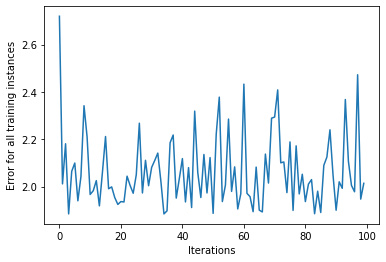

In [4]:
plt.plot(training_error)
plt.xlabel("Iterations")
plt.ylabel("Error for all training instances")
plt.savefig("cumulative_error.png")

<h4> Let's see how the model performs when it comes to a new data point </h4>

In [5]:
test_X = np.array([9, 1.0])
test_y = np.array([1])
pred = neural_network.predict(test_X)
print(pred, test_y)
abs(pred - test_y)

0.08977982478377645 [1]


array([0.91022018])

<h4> End! Well done on building your first neural network! </h4>